# Classification

## Imports and connections

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

## Data load

In [2]:
df = pd.read_csv("~/Coding/PycharmProjects/Education/projects/Neural Networks/datasets/cardio_train.csv", sep=";",
                 index_col="id")

In [3]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


## DA

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code | 1: women, 2: men
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [4]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Наш датасет не имеет пропусков, на первый взгляд есть выбросы(( и нужно преобразовать данные

### Data conversion

Преобразуем возраст в нормальный вид(из дней в года)

In [5]:
df["age"] = df["age"] / 365.25
df["age"] = df["age"].astype(int)

Бинаризуем данные гендера

In [6]:
df["gender"] = df["gender"].map({2: 1, 1: 0})

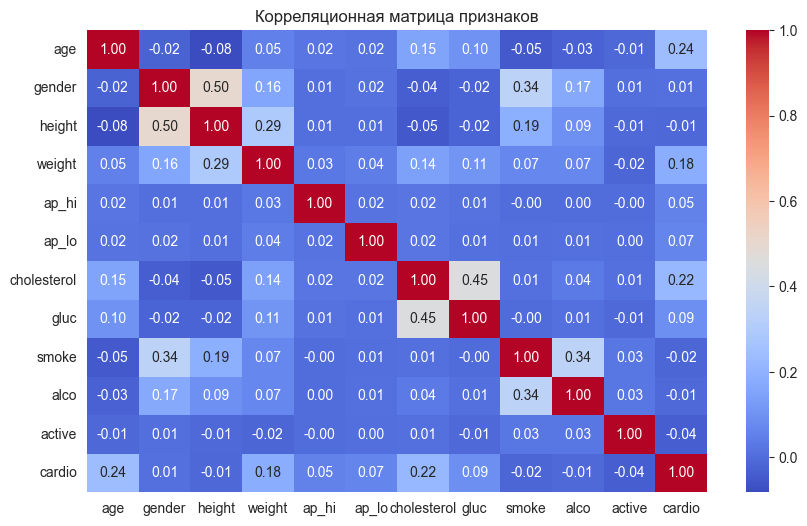

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

In [8]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,51,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,47,0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52,1,168,76.0,120,80,1,1,1,0,1,0
99995,61,0,158,126.0,140,90,2,2,0,0,1,1
99996,52,1,183,105.0,180,90,3,1,0,1,0,1


### Emissions cleaning

In [9]:
def remove_outliers_iqr(df, columns, factor = 3) -> pd.DataFrame:
    cleaned_df = df.copy()

    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        before = len(cleaned_df)
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
        after = len(cleaned_df)

        print(f"{col}: удалено {before - after} строк ({(before - after) / before:.2%})")

    return cleaned_df

In [10]:
cleaning_columns = ["age", "height", "weight", "ap_hi", "ap_lo"]
df = remove_outliers_iqr(df, cleaning_columns)

age: удалено 0 строк (0.00%)
height: удалено 93 строк (0.13%)
weight: удалено 162 строк (0.23%)
ap_hi: удалено 285 строк (0.41%)
ap_lo: удалено 1084 строк (1.56%)


In [11]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,51,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,47,0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52,1,168,76.0,120,80,1,1,1,0,1,0
99995,61,0,158,126.0,140,90,2,2,0,0,1,1
99996,52,1,183,105.0,180,90,3,1,0,1,0,1


## Models

### Preparing for training

In [12]:
def compute_metrics(y_true, y_pred, y_proba=None):
        metrics = {
            "Accuracy": accuracy_score(y_true, y_pred),
            "Precision": precision_score(y_true, y_pred, average='binary'),
            "Recall": recall_score(y_true, y_pred, average='binary'),
            "F1": f1_score(y_true, y_pred, average='binary')
        }
        if y_proba is not None:
            if y_proba.shape[1] > 1:
                y_proba = y_proba[:, 1]
            metrics["ROC AUC"] = roc_auc_score(y_true, y_proba)
        else:
            metrics["ROC AUC"] = np.nan
        return metrics

def check_metrics(y_train, y_test, y_pred_train, y_pred_test, y_proba_train=None, y_proba_test=None):
    train_metrics = compute_metrics(y_train, y_pred_train, y_proba_train)
    test_metrics = compute_metrics(y_test, y_pred_test, y_proba_test)

    df = pd.DataFrame([train_metrics, test_metrics], index=["Train", "Test"]).round(4)
    print("Метрики классификации:")
    display(df)

    print("\nМатрица ошибок (Train):")
    print(confusion_matrix(y_train, y_pred_train))
    print("\nМатрица ошибок (Test):")
    print(confusion_matrix(y_test, y_pred_test))


    if (y_proba_train is not None) and (y_proba_test is not None):
        if y_proba_train.shape[1] > 1:
            y_proba_train = y_proba_train[:, 1]
        if y_proba_test.shape[1] > 1:
            y_proba_test = y_proba_test[:, 1]

        fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
        fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)

        auc_train = roc_auc_score(y_train, y_proba_train)
        auc_test = roc_auc_score(y_test, y_proba_test)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr_train, tpr_train, label=f"Train (AUC = {auc_train:.3f})", linestyle="--")
        plt.plot(fpr_test, tpr_test, label=f"Test (AUC = {auc_test:.3f})")
        plt.plot([0, 1], [0, 1], 'k--', label="Random")
        plt.title("ROC-кривые", fontsize=14)
        plt.xlabel("False Positive Rate (1 - Specificity)", fontsize=12)
        plt.ylabel("True Positive Rate (Recall)", fontsize=12)
        plt.legend()
        plt.grid(True)
        plt.show()

In [13]:
X = df.drop(columns="cardio")
y = df["cardio"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2004, stratify=y
)

### Liner model

In [14]:
num_features = ["age", "height", "weight", "ap_hi", "ap_lo"]
cat_features = ["cholesterol", "gluc"]
binary_features = ["gender", "smoke", "alco", "active"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features),
        ("bin", "passthrough", binary_features)
    ]
)

In [15]:
for col in num_features:
    mean_train = X_train[col].mean()
    std_train = X_train[col].std()
    mean_test = X_test[col].mean()
    std_test = X_test[col].std()

    print(f"{col}:")
    print(f"  Train mean={mean_train:.3f}, std={std_train:.3f}")
    print(f"  Test  mean={mean_test:.3f}, std={std_test:.3f}")
    print(f"  delta(mean)={abs(mean_train - mean_test):.3f}, delta(std)={abs(std_train - std_test):.3f}\n")

age:
  Train mean=52.809, std=6.758
  Test  mean=52.726, std=6.795
  delta(mean)=0.083, delta(std)=0.036

height:
  Train mean=164.399, std=7.834
  Test  mean=164.528, std=7.858
  delta(mean)=0.130, delta(std)=0.024

weight:
  Train mean=73.912, std=13.865
  Test  mean=74.005, std=13.793
  delta(mean)=0.092, delta(std)=0.072

ap_hi:
  Train mean=126.532, std=16.492
  Test  mean=126.481, std=16.419
  delta(mean)=0.051, delta(std)=0.073

ap_lo:
  Train mean=81.258, std=9.312
  Test  mean=81.341, std=9.347
  delta(mean)=0.084, delta(std)=0.034



Разница между значениями минимальна, и теперь preprocessor даст нам максимально похожие значения на test и train, при этом никакого data leak не будет


In [16]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

all_columns = preprocessor.get_feature_names_out()

for i in range(len(all_columns)):
    all_columns[i] = all_columns[i].split("__")[1]

In [17]:
X_train_log = pd.DataFrame(X_train_transformed, columns=all_columns, index=X_train.index)
X_test_log = pd.DataFrame(X_test_transformed, columns=all_columns, index=X_test.index)

y_train_log = y_train.copy()
y_test_log = y_test.copy()

#### Analytical solution

In [18]:
X_train_ = np.hstack([np.ones((X_train_log.shape[0], 1)), X_train_log])
X_test_ = np.hstack([np.ones((X_test_log.shape[0], 1)), X_test_log])

y_train_ = y_train_log.values.reshape(-1, 1)

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [20]:
theta = np.zeros((X_train_.shape[1], 1))
alpha = 0.01
n_iterations = 10000

for i in range(n_iterations):
    z = X_train_ @ theta
    h = sigmoid(z)
    gradient = (X_train_.T @ (h - y_train_)) / len(y_train_)
    theta -= alpha * gradient

In [21]:
y_log_prob_train_analytical = sigmoid(X_train_ @ theta)
y_log_prob_test_analytical = sigmoid(X_test_ @ theta)

In [22]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_log, y_log_prob_train_analytical)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_log, y_log_prob_test_analytical)

i_train = np.argmax(tpr_train - fpr_train)
i_test = np.argmax(tpr_test - fpr_test)

threshold_train = thresholds_train[i_train]
threshold_test = thresholds_test[i_test]

In [23]:
y_log_pred_train_analytical = (y_log_prob_train_analytical >= threshold_train).astype(int)
y_log_pred_test_analytical = (y_log_prob_test_analytical >= threshold_test).astype(int)

#### Library solution

In [24]:
model_log = LogisticRegression(max_iter=10000, solver="lbfgs", random_state=2004)
model_log.fit(X_train_log, y_train_log)

LogisticRegression(max_iter=10000, random_state=2004)

In [25]:
y_log_prob_train_lib = model_log.predict_proba(X_train_log)
y_log_prob_test_lib = model_log.predict_proba(X_test_log)

y_log_pred_train_lib = model_log.predict(X_train_log)
y_log_pred_test_lib = model_log.predict(X_test_log)

#### Result

##### Feature

In [26]:
features = ["Intercept"] + list(X_train_log)

comparison = pd.DataFrame({
    "Feature": features,
    "Analytical": theta.flatten(),
    "Sklearn": np.hstack([model_log.intercept_, model_log.coef_.flatten()])
})

comparison

,Feature,Analytical,Sklearn
0,Intercept,0.247320,0.283413
1,age,0.352509,0.349447
2,height,-0.034765,-0.030070
3,weight,0.161273,0.158470
4,ap_hi,0.912152,0.920171
5,ap_lo,0.117309,0.110692
6,cholesterol_1,-0.372290,-0.408508
7,cholesterol_2,0.059131,-0.002897
8,cholesterol_3,0.560479,0.693747
9,gluc_1,0.171552,0.212373


##### Metrics

Проверяем метрики для аналитического решения, при этом проверяем, чтобы не было переобучения

Метрики классификации:


,Accuracy,Precision,Recall,F1,ROC AUC
Train,0.7297,0.7371,0.7033,0.7198,0.7914
Test,0.7285,0.7378,0.6982,0.7174,0.7893



Матрица ошибок (Train):
[[20921  6774]
 [ 8013 18992]]

Матрица ошибок (Test):
[[5249 1675]
 [2038 4714]]


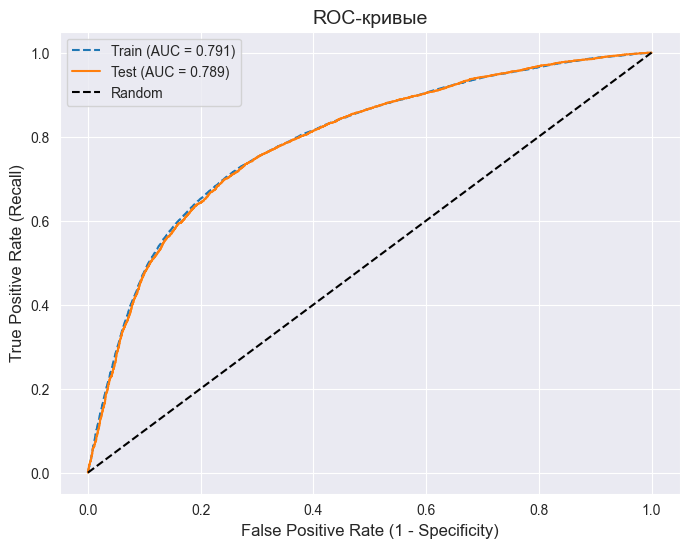

In [27]:
check_metrics(y_train_log, y_test_log, y_log_pred_train_analytical, y_log_pred_test_analytical, y_log_prob_train_analytical, y_log_prob_test_analytical)

Проверяем метрики для билиотечного решения, при этом проверяем, чтобы не было переобучения

Метрики классификации:


,Accuracy,Precision,Recall,F1,ROC AUC
Train,0.7284,0.7546,0.6666,0.7079,0.7918
Test,0.7251,0.7532,0.6591,0.7030,0.7899



Матрица ошибок (Train):
[[21840  5855]
 [ 9003 18002]]

Матрица ошибок (Test):
[[5466 1458]
 [2302 4450]]


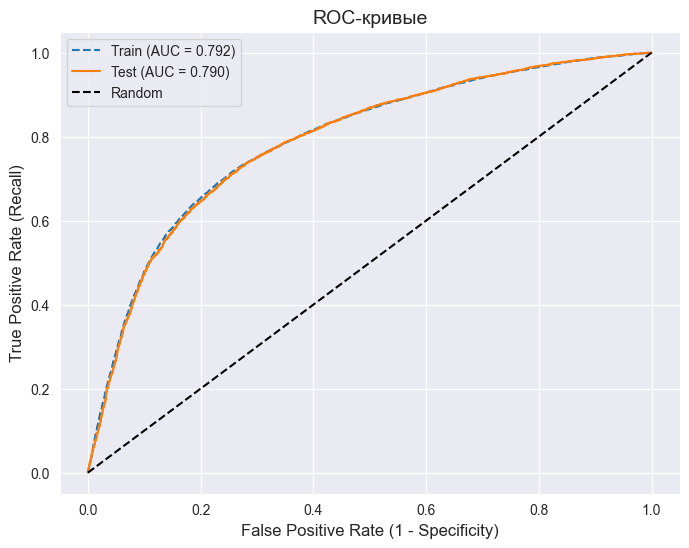

In [28]:
check_metrics(y_train_log, y_test_log, y_log_pred_train_lib, y_log_pred_test_lib, y_log_prob_train_lib,
              y_log_prob_test_lib)

### Decision tree

#### Analytical solution

In [29]:
def entropy(y):
    p = y.value_counts(normalize=True)
    return -np.sum(p * np.log2(p))


def IG(X_col, y):
    total_entropy = entropy(y)
    threshold = X_col.median()
    left = y[X_col <= threshold]
    right = y[X_col > threshold]
    weighted_entropy = (len(left) / len(y)) * entropy(left) + (len(right) / len(y)) * entropy(right)
    return total_entropy - weighted_entropy, threshold

In [30]:
def build_tree(X, y, min_ig=0.01, min_samples=10, depth=0, max_depth=3):
    if len(y) < min_samples or depth >= max_depth:
        return {"class": y.mode()[0]}

    ig_values = {}
    thresholds = {}
    for col in X.columns:
        ig, thr = IG(X[col], y)
        ig_values[col] = ig
        thresholds[col] = thr

    best_feature = max(ig_values, key=ig_values.get)
    if ig_values[best_feature] < min_ig:
        return {"class": y.mode()[0]}

    threshold = thresholds[best_feature]
    left_idx = X[best_feature] <= threshold
    right_idx = X[best_feature] > threshold

    left_tree = build_tree(X[left_idx], y[left_idx], min_ig, min_samples, depth + 1, max_depth)
    right_tree = build_tree(X[right_idx], y[right_idx], min_ig, min_samples, depth + 1, max_depth)

    return {"feature": best_feature, "threshold": threshold,
            "left": left_tree, "right": right_tree}

In [31]:
def predict_analytic(tree, X_row):
    if "class" in tree:
        return tree["class"]
    feature = tree["feature"]
    threshold = tree["threshold"]
    if X_row[feature] <= threshold:
        return predict_analytic(tree["left"], X_row)
    else:
        return predict_analytic(tree["right"], X_row)


In [32]:
analytic_tree = build_tree(X_train, y_train, min_ig=0.01, min_samples=10, max_depth=5)
analytic_tree

{'feature': 'ap_hi',
 'threshold': 120.0,
 'left': {'feature': 'age',
  'threshold': 52.0,
  'left': {'feature': 'cholesterol',
   'threshold': 1.0,
   'left': {'class': 0},
   'right': {'feature': 'cholesterol',
    'threshold': 2.0,
    'left': {'feature': 'weight',
     'threshold': 71.0,
     'left': {'class': 0},
     'right': {'class': 0}},
    'right': {'feature': 'weight',
     'threshold': 70.0,
     'left': {'class': 0},
     'right': {'class': 1}}}},
  'right': {'feature': 'age',
   'threshold': 57.0,
   'left': {'class': 0},
   'right': {'feature': 'age',
    'threshold': 60.0,
    'left': {'class': 0},
    'right': {'feature': 'cholesterol',
     'threshold': 1.0,
     'left': {'class': 1},
     'right': {'class': 1}}}}},
 'right': {'feature': 'ap_hi',
  'threshold': 140.0,
  'left': {'feature': 'ap_hi',
   'threshold': 135.0,
   'left': {'feature': 'cholesterol',
    'threshold': 1.0,
    'left': {'class': 1},
    'right': {'class': 1}},
   'right': {'class': 1}},
  'righ

In [33]:
y_tree_pred_train_analytical = X_train.apply(lambda row: predict_analytic(analytic_tree, row), axis=1)
y_tree_pred_test_analytical = X_test.apply(lambda row: predict_analytic(analytic_tree, row), axis=1)

#### Library solution

Найдем оптимальную глубину для библиотечного дерева

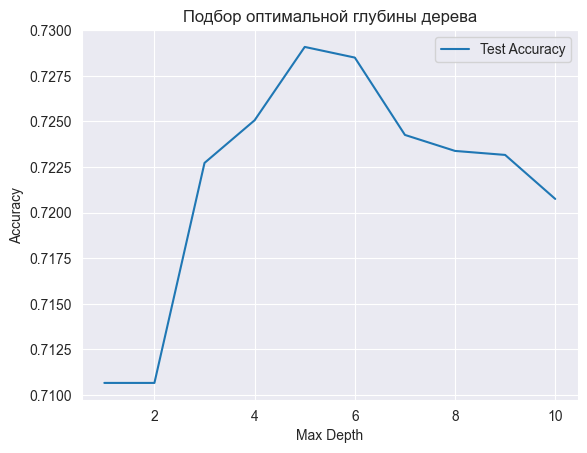

In [34]:
depths = range(1, 11)
train_acc = []
test_acc = []

for d in depths:
    model_tree_test = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=2004, min_samples_leaf=10)
    model_tree_test.fit(X_train, y_train)
    test_acc.append(accuracy_score(y_test, model_tree_test.predict(X_test)))

plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Подбор оптимальной глубины дерева')
plt.legend()
plt.show()

In [35]:
model_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=10,
    random_state=2004
)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       random_state=2004)

In [36]:
y_tree_prob_train_lib = model_tree.predict_proba(X_train)
y_tree_prob_test_lib = model_tree.predict_proba(X_test)

y_tree_pred_train_lib = model_tree.predict(X_train)
y_tree_pred_test_lib = model_tree.predict(X_test)

#### Result

##### Metrics

Проверяем метрики для аналитического решения, при этом проверяем, чтобы не было переобучения

In [37]:
check_metrics(y_train, y_test, y_tree_pred_train_analytical, y_tree_pred_test_analytical)

Метрики классификации:


,Accuracy,Precision,Recall,F1,ROC AUC
Train,0.7204,0.7244,0.6998,0.7119,NaN
Test,0.7153,0.7208,0.6911,0.7056,NaN



Матрица ошибок (Train):
[[20507  7188]
 [ 8107 18898]]

Матрица ошибок (Test):
[[5117 1807]
 [2086 4666]]


Проверяем метрики для библиотечного решения, при этом проверяем, чтобы не было переобучения

Метрики классификации:


,Accuracy,Precision,Recall,F1,ROC AUC
Train,0.7312,0.7556,0.6734,0.7122,0.7944
Test,0.7291,0.7554,0.6674,0.7087,0.7883



Матрица ошибок (Train):
[[21813  5882]
 [ 8819 18186]]

Матрица ошибок (Test):
[[5465 1459]
 [2246 4506]]


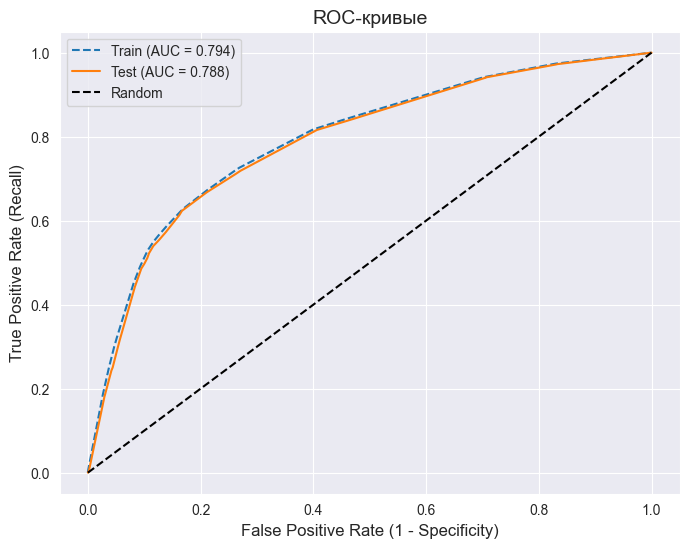

In [38]:
check_metrics(y_train, y_test, y_tree_pred_train_lib, y_tree_pred_test_lib, y_tree_prob_train_lib,
              y_tree_prob_test_lib)

##### Visualization

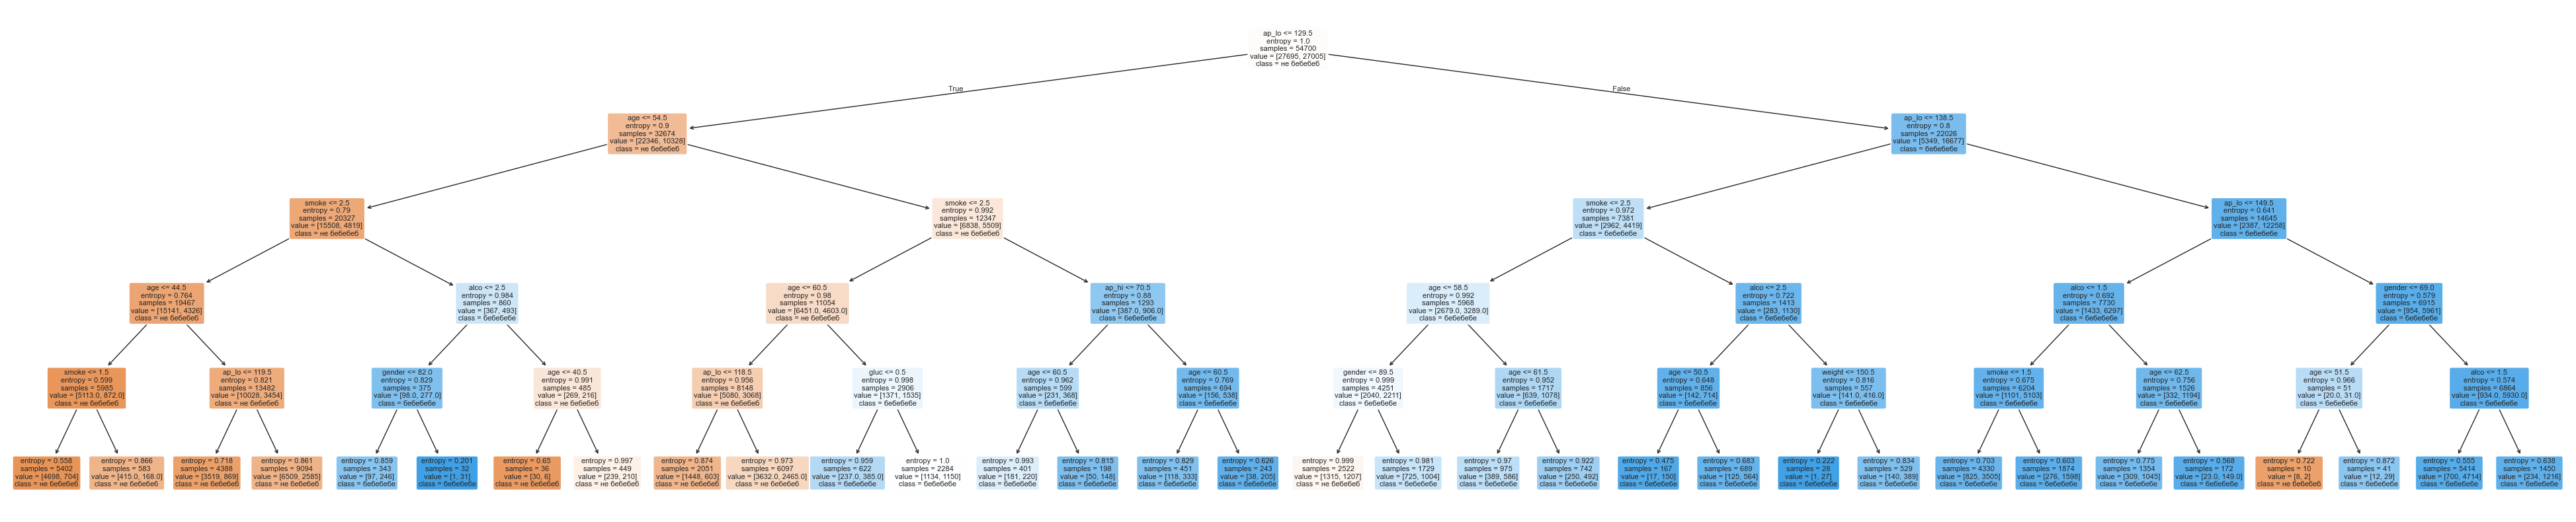

In [39]:
fig, axes = plt.subplots(figsize=(50, 10))
plot_tree(model_tree,
          feature_names=["age", "height", "weight", "ap_hi", "ap_lo", "gender", "smoke", "alco", "active",
                         "cholesterol", "gluc"],
          class_names=['не бебебеб', 'бебебебе'],
          filled=True,
          rounded=True,
          fontsize=8)
plt.show()

### Random Forest

#### Model

In [40]:
model_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    random_state=2004,
    n_jobs=-1,
    bootstrap=True,
    max_features="sqrt",
    oob_score=True
)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=2004)

In [41]:
y_rf_prob_train_lib = model_rf.predict_proba(X_train)
y_rf_prob_test_lib = model_rf.predict_proba(X_test)

y_rf_pred_train_lib = model_rf.predict(X_train)
y_rf_pred_test_lib = model_rf.predict(X_test)

#### Metrics

Метрики классификации:


,Accuracy,Precision,Recall,F1,ROC AUC
Train,0.7362,0.7705,0.6632,0.7129,0.8068
Test,0.7284,0.7660,0.6477,0.7019,0.7963



Матрица ошибок (Train):
[[22360  5335]
 [ 9094 17911]]

Матрица ошибок (Test):
[[5588 1336]
 [2379 4373]]


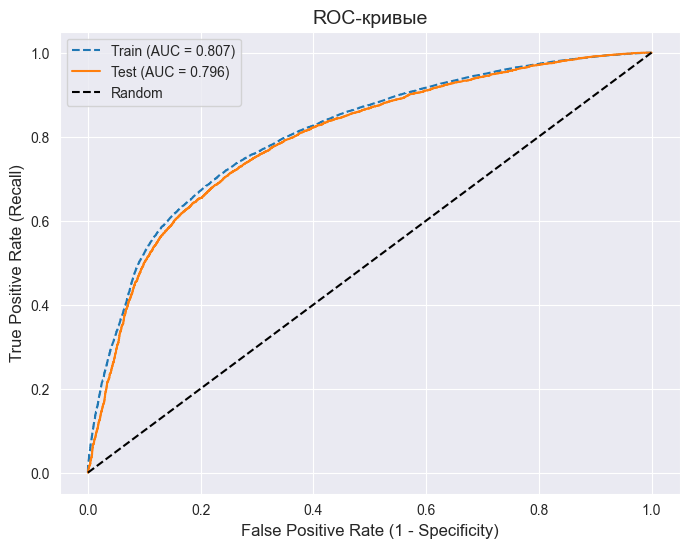

In [42]:
check_metrics(y_train, y_test, y_rf_pred_train_lib, y_rf_pred_test_lib, y_rf_prob_train_lib,
              y_rf_prob_test_lib)

### Cat Boosting

#### Model

In [43]:
model_cat = CatBoostClassifier(
    iterations=2000,
    depth=7,
    learning_rate=0.01,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=2004
)

model_cat.fit(X_train, y_train)

0:	total: 65.8ms	remaining: 2m 11s
1:	total: 71.3ms	remaining: 1m 11s
2:	total: 76.1ms	remaining: 50.6s
3:	total: 80.4ms	remaining: 40.1s
4:	total: 85ms	remaining: 33.9s
5:	total: 88.9ms	remaining: 29.5s
6:	total: 93.8ms	remaining: 26.7s
7:	total: 99.7ms	remaining: 24.8s
8:	total: 105ms	remaining: 23.3s
9:	total: 110ms	remaining: 22s
10:	total: 115ms	remaining: 20.8s
11:	total: 121ms	remaining: 20s
12:	total: 126ms	remaining: 19.2s
13:	total: 131ms	remaining: 18.6s
14:	total: 138ms	remaining: 18.2s
15:	total: 144ms	remaining: 17.8s
16:	total: 149ms	remaining: 17.4s
17:	total: 154ms	remaining: 17s
18:	total: 159ms	remaining: 16.6s
19:	total: 164ms	remaining: 16.3s
20:	total: 170ms	remaining: 16s
21:	total: 176ms	remaining: 15.8s
22:	total: 181ms	remaining: 15.5s
23:	total: 186ms	remaining: 15.3s
24:	total: 191ms	remaining: 15.1s
25:	total: 196ms	remaining: 14.9s
26:	total: 203ms	remaining: 14.8s
27:	total: 209ms	remaining: 14.7s
28:	total: 214ms	remaining: 14.5s
29:	total: 219ms	remaini

In [44]:
y_cat_prob_train_lib = model_cat.predict_proba(X_train)
y_cat_prob_test_lib = model_cat.predict_proba(X_test)

y_cat_pred_train_lib = model_cat.predict(X_train)
y_cat_pred_test_lib = model_cat.predict(X_test)

#### Metrics

Метрики классификации:


,Accuracy,Precision,Recall,F1,ROC AUC
Train,0.7482,0.7666,0.7044,0.7342,0.8231
Test,0.7316,0.7523,0.6805,0.7146,0.7991



Матрица ошибок (Train):
[[21902  5793]
 [ 7982 19023]]

Матрица ошибок (Test):
[[5411 1513]
 [2157 4595]]


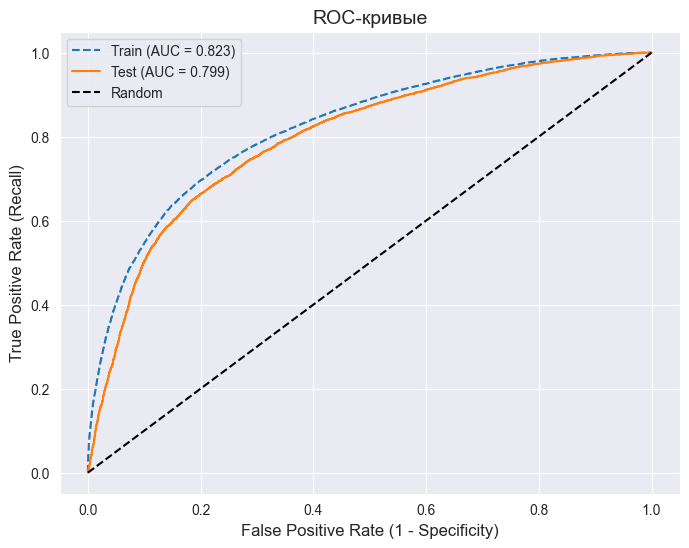

In [45]:
check_metrics(y_train, y_test, y_cat_pred_train_lib, y_cat_pred_test_lib, y_cat_prob_train_lib,
              y_cat_prob_test_lib)